# Support Vector Machines
You should build a machine learning pipeline using a support vector machine model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [1]:
# importing libraries

import pandas as pd # used for csv
from sklearn.model_selection import train_test_split # used for spliting data into df_train and df_test
import sklearn.svm # used to train the model via svm
from sklearn.metrics import accuracy_score # used to get accuracy of the model
import matplotlib.pyplot as plt # used for plotting the data
import numpy as np # used to  get random number for matplotlib

In [2]:
# reading data(.csv) using pandas as pd and then exploring the data

df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")
print(df.head())
print("___________________________________________________________________________")
print(df.info())
print("___________________________________________________________________________")
print(df.dtypes)
print("___________________________________________________________________________")
print(df.isnull().sum())
print("___________________________________________________________________________")
print(df.duplicated().sum())
print("___________________________________________________________________________")
print(df.shape)

      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  31953      5       0       0       0       0       0       0       0   
1  34452      8       0       0       0       0       0       0       0   
2  60897      5       0       0       0       0       0       0       0   
3  36953      0       0       0       0       0       0       0       0   
4   1981      3       0       0       0       0       0       0       0   

   pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0     

In [3]:
# spliting the data into train and test (75/25)

df_train, df_test = train_test_split(df)
print("Shape of original data:- ",df.shape)
print("Shape of train data:- ",df_train.shape)
print("Shape of test data:- ",df_test.shape)

Shape of original data:-  (4000, 786)
Shape of train data:-  (3000, 786)
Shape of test data:-  (1000, 786)


In [4]:
"""
dropping id column
dropping class column from df_train and df_test to get x_train and x_test
adding class column from df to df_train and df_test
"""

x_train = df_train.drop("class", axis=1,)
x_train = x_train.drop("id", axis=1)
y_train = df_train["class"]

x_test = df_test.drop("class", axis=1)
x_test = x_test.drop("id", axis=1)
y_test = df_test["class"]

print("Shape of x_train:- ",x_train.shape)
print("Shape of x_test:- ",x_test.shape)
print("Shape of y_train:- ",y_train.shape)
print("Shape of y_test:- ",y_test.shape)

Shape of x_train:-  (3000, 784)
Shape of x_test:-  (1000, 784)
Shape of y_train:-  (3000,)
Shape of y_test:-  (1000,)


In [5]:
"""
Scaling the data using StandardScaler
but we could use MinMaxScaler as well
"""
numerical_attributes = x_train.select_dtypes(include=['int64']).columns

ct = sklearn.compose.ColumnTransformer([("scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),])
ct.fit(x_train)

x_train_transformed = ct.transform(x_train)
x_test_transformed = ct.transform(x_test)

In [6]:
# training the model using SVC at C=4
model = sklearn.svm.SVC(C=4)
model.fit(x_train_transformed, y_train)

SVC(C=4)

In [7]:
# checking Accuracy
y_pred = model.predict(x_test_transformed)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}%\n")

Accuracy: 93.4%



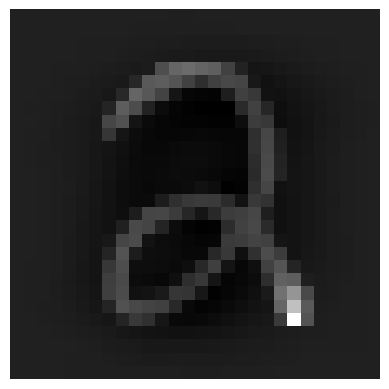

In [8]:
# displaying the pixels

index = np.random.choice(len(x_test), 1, replace=False)[0] # we could remove index (random) to get specific plt
image = x_test_transformed[index].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()